<h2 align="center">L2 Regularization<h2>

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Load


Dataset Credits

@dataset{sonar-mines-vs-rocks,
  author = {Gorman, R Paul and Sejnowski, Terrence J.},
  title = {Connectionist Bench (Sonar, Mines vs. Rocks)},
  year = {1988},
  publisher = {University of California, Irvine. Machine Learning Repository},
  url = {https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks}
}

In [2]:
df = pd.read_csv("sonar.all-data", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
114,0.0114,0.0222,0.0269,0.0384,0.1217,0.2062,0.1489,0.0929,0.1350,0.1799,...,0.0269,0.0152,0.0257,0.0097,0.0041,0.0050,0.0145,0.0103,0.0025,M
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,M
176,0.0635,0.0709,0.0453,0.0333,0.0185,0.1260,0.1015,0.1918,0.3362,0.3900,...,0.0048,0.0025,0.0087,0.0072,0.0095,0.0086,0.0085,0.0040,0.0051,M
60,0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,...,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016,R
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041,R


In [3]:
df.shape

(208, 61)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [7]:
X = df.drop(60, axis=1)
y = df[60]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
X_train.shape

(156, 60)

In [9]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1])

In [10]:
# Convert the split arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [11]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

### Train a Neural Network Without Any Regularization

In [12]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

In [13]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/40, Train Loss: 0.6955, Val Loss: 0.6673, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6751, Val Loss: 0.6538, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6627, Val Loss: 0.6396, Val Accuracy: 0.5769
Epoch 4/40, Train Loss: 0.6425, Val Loss: 0.6163, Val Accuracy: 0.6731
Epoch 5/40, Train Loss: 0.6140, Val Loss: 0.5920, Val Accuracy: 0.6923
Epoch 6/40, Train Loss: 0.5794, Val Loss: 0.5782, Val Accuracy: 0.7500
Epoch 7/40, Train Loss: 0.5339, Val Loss: 0.5333, Val Accuracy: 0.7115
Epoch 8/40, Train Loss: 0.4971, Val Loss: 0.5511, Val Accuracy: 0.7692
Epoch 9/40, Train Loss: 0.4693, Val Loss: 0.4997, Val Accuracy: 0.7115
Epoch 10/40, Train Loss: 0.4408, Val Loss: 0.4851, Val Accuracy: 0.7115
Epoch 11/40, Train Loss: 0.4144, Val Loss: 0.4911, Val Accuracy: 0.7500
Epoch 12/40, Train Loss: 0.3785, Val Loss: 0.4767, Val Accuracy: 0.7500
Epoch 13/40, Train Loss: 0.3645, Val Loss: 0.5004, Val Accuracy: 0.7115
Epoch 14/40, Train Loss: 0.3673, Val Loss: 0.4596, Val Accuracy: 0.7692
E

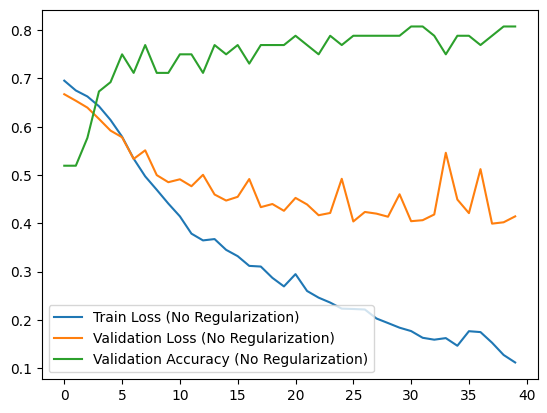

In [14]:
# Initialize and train the model without dropout
model_without_reg = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_reg.parameters(), lr=0.001)

train_losses_no_reg, val_losses_no_reg, val_accuracies_no_reg = train_model(
    model_without_reg, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_losses_no_reg, label="Train Loss (No Regularization)")
plt.plot(val_losses_no_reg, label="Validation Loss (No Regularization)")
plt.plot(val_accuracies_no_reg, label="Validation Accuracy (No Regularization)")
plt.legend()
plt.show()

### Train a Neural Network With L2 Regularization

Epoch 1/40, Train Loss: 0.6907, Val Loss: 0.6657, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6840, Val Loss: 0.6717, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6824, Val Loss: 0.6714, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6810, Val Loss: 0.6690, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6800, Val Loss: 0.6679, Val Accuracy: 0.5192
Epoch 6/40, Train Loss: 0.6787, Val Loss: 0.6640, Val Accuracy: 0.5192
Epoch 7/40, Train Loss: 0.6793, Val Loss: 0.6601, Val Accuracy: 0.5192
Epoch 8/40, Train Loss: 0.6746, Val Loss: 0.6638, Val Accuracy: 0.5192
Epoch 9/40, Train Loss: 0.6763, Val Loss: 0.6657, Val Accuracy: 0.5577
Epoch 10/40, Train Loss: 0.6721, Val Loss: 0.6547, Val Accuracy: 0.5192
Epoch 11/40, Train Loss: 0.6695, Val Loss: 0.6556, Val Accuracy: 0.5192
Epoch 12/40, Train Loss: 0.6663, Val Loss: 0.6503, Val Accuracy: 0.5192
Epoch 13/40, Train Loss: 0.6617, Val Loss: 0.6437, Val Accuracy: 0.5577
Epoch 14/40, Train Loss: 0.6633, Val Loss: 0.6408, Val Accuracy: 0.6346
E

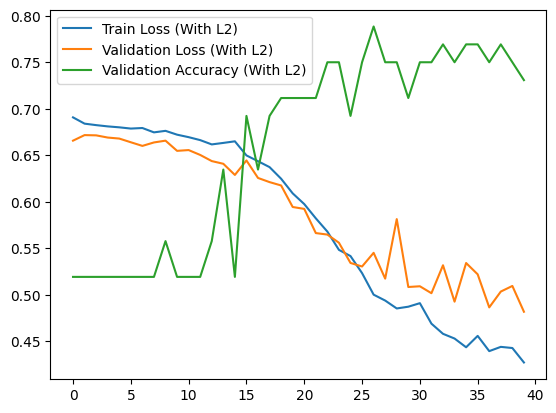

In [15]:
# Initialize and train the model with L2 regularization
model_with_l2 = NeuralNet()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.001, weight_decay=0.04) # weight decay parameter is used for L2 regularization

train_losses_with_l2, val_losses_with_l2, val_accuracies_with_l2 = train_model(
    model_with_l2, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_l2, label="Train Loss (With L2)")
plt.plot(val_losses_with_l2, label="Validation Loss (With L2)")
plt.plot(val_accuracies_with_l2, label="Validation Accuracy (With L2)")
plt.legend()
plt.show()